# **Assignment : Anime Recommended System**

- 62010278 ณัฐพนธ์ สุขถาวร 
- 62010497 นิธิ น้อมประวัติ 
- 62010609 พักตร์ภูมิ ตาแพร่ 
- 62010948 สิรวิชญ์ สุขวัฒนาวิทย์ 

## **Import Libraries**

In [1216]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## **Global Config**

In [1217]:
sns.set_theme(style="whitegrid", palette="pastel")


class CONFIG:
    PLT_FIG_SIZE = plt.figaspect(8/19)


# color codes for python build-in print function
class PRINT_COLOR_CODE:
    BLUE = '\033[94m'
    CYAN = '\033[96m'
    GREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    ENDC = '\033[0m'


## **Define Util Functions**

In [1218]:
# function to return list of columns which contained Nan value
def get_cols_contained_na(df):
    masked_na_df = df.isna()
    cols_with_na = df.columns[masked_na_df.any()].tolist()
    return cols_with_na


## **Import Datasets**

In [1219]:
ANIME_CSV_PATH = "./datasets/anime.csv"
RATING_CSV_PATH = "./datasets/rating.csv"


In [1220]:
anime_df = pd.read_csv(ANIME_CSV_PATH)
anime_df.rename(columns={'rating': 'average_rating'}, inplace=True)

rating_df = pd.read_csv(RATING_CSV_PATH)
rating_df.rename(columns={'rating': 'user_rating'}, inplace=True)

rating_merged_df = rating_df.merge(anime_df, on='anime_id', how='inner')


## **Data Exploration (1)**

### 1. **Anime Dataframe** Basic Info.

In [1221]:
print(f'\n{PRINT_COLOR_CODE.FAIL}List of columns that contain NaN values : {PRINT_COLOR_CODE.WARNING}{get_cols_contained_na(anime_df)}{PRINT_COLOR_CODE.ENDC}')

anime_df



List of columns that contain NaN values : ['genre', 'type', 'average_rating']


,anime_id,name,genre,type,episodes,average_rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


,anime_id,average_rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


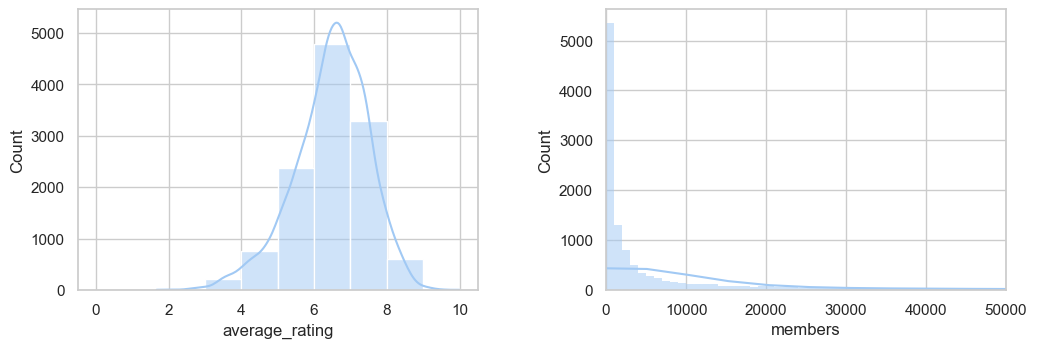

In [1222]:
fig, axs = plt.subplots(ncols=2, figsize=CONFIG.PLT_FIG_SIZE)
fig.tight_layout(pad=5.0)

sns.histplot(anime_df, x='average_rating', kde=True,
             binrange=[0, 10], binwidth=1, ax=axs[0])
sns.histplot(anime_df, x='members', kde=True,
             binwidth=1e3, ax=axs[1])
plt.xlim(0, 0.05e6)

anime_df.describe()


### 2. **Rating Dataframe** Basic info.

In [1223]:
print(f'\n{PRINT_COLOR_CODE.FAIL}List of columns that contain NaN values : {PRINT_COLOR_CODE.WARNING}{get_cols_contained_na(rating_df)}{PRINT_COLOR_CODE.ENDC}')

rating_df


List of columns that contain NaN values : []


,user_id,anime_id,user_rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


,user_id,anime_id,user_rating
count,7813737.0,7813737.0,7813737.0
mean,36728.0,8909.1,6.1
std,20997.9,8883.9,3.7
min,1.0,1.0,-1.0
25%,18974.0,1240.0,6.0
50%,36791.0,6213.0,7.0
75%,54757.0,14093.0,9.0
max,73516.0,34519.0,10.0


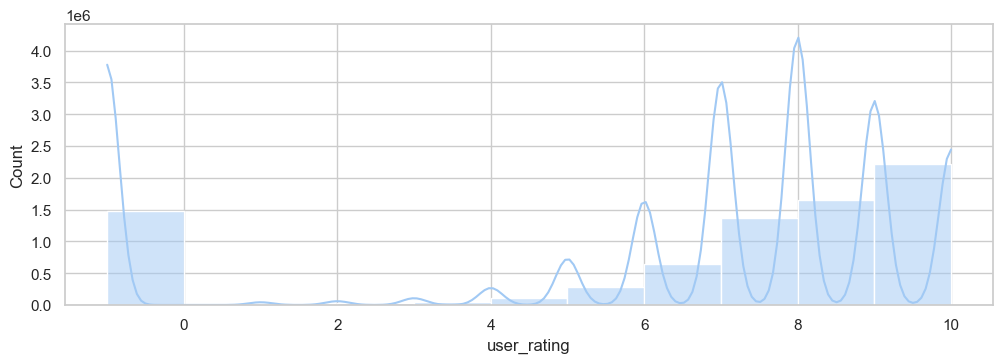

In [1224]:
fig, axs = plt.subplots(ncols=1, figsize=CONFIG.PLT_FIG_SIZE)
fig.tight_layout(pad=5.0)

sns.histplot(rating_df, x='user_rating', kde=True,
             binrange=[-1, 10], binwidth=1, ax=axs)

rating_df.describe().apply(lambda s: s.apply('{0:.1f}'.format))


### 3. **Rating Merged Dataframe** Basic info.

In [1225]:
print(f'\n{PRINT_COLOR_CODE.FAIL}List of columns that contain NaN values : {PRINT_COLOR_CODE.WARNING}{get_cols_contained_na(rating_merged_df)}{PRINT_COLOR_CODE.ENDC}')

rating_merged_df



List of columns that contain NaN values : ['genre', 'type', 'average_rating']


,user_id,anime_id,user_rating,name,genre,type,episodes,average_rating,members
0,1,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
1,3,20,8,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
2,5,20,6,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
3,6,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
4,10,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
...,...,...,...,...,...,...,...,...,...
7813722,65682,30450,8,Dr. Slump: Hoyoyo! Arale no Himitsu Dai Koukai...,"Comedy, Sci-Fi, Shounen",Special,1,6.17,248
7813723,69497,33484,10,Shiroi Zou,"Action, Historical, Kids",Movie,1,4.71,45
7813724,70463,29481,-1,Kakinoki Mokkii,"Fantasy, Kids",Special,1,4.33,61
7813725,72404,34412,-1,Hashiri Hajimeta bakari no Kimi ni,Music,Music,1,6.76,239


,user_id,anime_id,user_rating,average_rating,members
count,7.813727e+06,7.813727e+06,7.813727e+06,7.813721e+06,7.813727e+06
mean,3.672795e+04,8.909045e+03,6.144036e+00,7.653127e+00,1.786208e+05
std,2.099795e+04,8.883923e+03,3.727796e+00,6.730287e-01,1.881764e+05
min,1.000000e+00,1.000000e+00,-1.000000e+00,1.670000e+00,2.900000e+01
25%,1.897400e+04,1.240000e+03,6.000000e+00,7.270000e+00,4.403000e+04
50%,3.679100e+04,6.213000e+03,7.000000e+00,7.680000e+00,1.104700e+05
75%,5.475700e+04,1.409300e+04,9.000000e+00,8.130000e+00,2.442680e+05
max,7.351600e+04,3.451900e+04,1.000000e+01,9.500000e+00,1.013917e+06


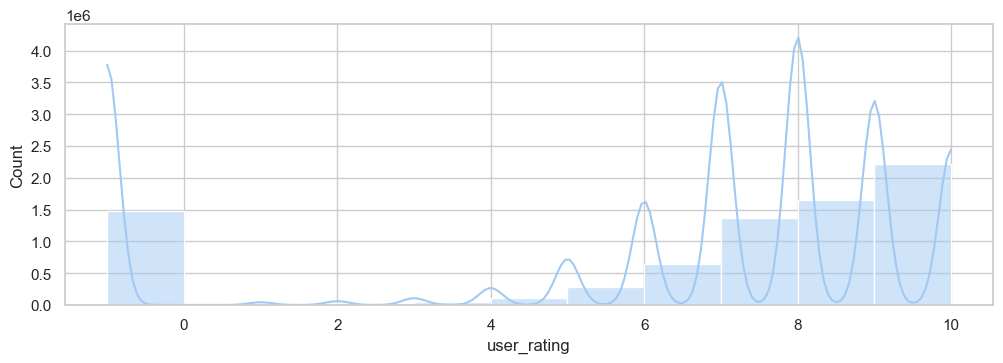

In [1226]:
fig, axs = plt.subplots(ncols=1, figsize=CONFIG.PLT_FIG_SIZE)
fig.tight_layout(pad=5.0)

sns.histplot(rating_merged_df, x='user_rating', kde=True,
             binrange=[-1, 10], binwidth=1, ax=axs)

rating_merged_df.describe()


In [1227]:
rating_merged_df.groupby(by='type').count().sort_values(
    by='user_id', ascending=False).rename(columns={'user_id': 'count'})[['count']]


,count
type,
TV,5283596
Movie,1051998
OVA,800307
Special,559366
ONA,91956
Music,26500


## **Data Cleansing (1)**

In Anime DataFrame, drop all anime types except `TV`, `Movie` and `OVA`

In [1228]:
# type_except_list = ["TV", 'Movie', 'OVA']

# print(
#     f"{PRINT_COLOR_CODE.FAIL}drop all anime types except {PRINT_COLOR_CODE.GREEN}{type_except_list}{PRINT_COLOR_CODE.ENDC}"
# )

# new_anime_df = anime_df[anime_df['type'].isin(type_except_list)]

# drop_count = len(anime_df)-len(new_anime_df)
# drop_percentage = (drop_count/len(anime_df))*100

# print(
#     f"{PRINT_COLOR_CODE.FAIL}drop {PRINT_COLOR_CODE.WARNING}{drop_count}{PRINT_COLOR_CODE.ENDC} {PRINT_COLOR_CODE.FAIL}rows{PRINT_COLOR_CODE.ENDC} ({drop_percentage:.4f}%)"
# )

# anime_df = new_anime_df

# anime_df.reset_index(drop=True, inplace=True)
# anime_df


In Anime DataFrame, drop less than `1000` members anime

In [1229]:
# min_n_members_threshold = 1000

# print(
#     f"{PRINT_COLOR_CODE.FAIL}drop less than {PRINT_COLOR_CODE.WARNING}{min_n_members_threshold}{PRINT_COLOR_CODE.ENDC} {PRINT_COLOR_CODE.FAIL}members anime{PRINT_COLOR_CODE.ENDC}"
# )

# new_anime_df = anime_df[anime_df['members'] >= min_n_members_threshold]

# drop_count = len(anime_df)-len(new_anime_df)
# drop_percentage = (drop_count/len(anime_df))*100

# print(
#     f"{PRINT_COLOR_CODE.FAIL}drop {PRINT_COLOR_CODE.WARNING}{drop_count}{PRINT_COLOR_CODE.ENDC} {PRINT_COLOR_CODE.FAIL}rows{PRINT_COLOR_CODE.ENDC} ({drop_percentage:.4f}%)"
# )

# anime_df = new_anime_df

# anime_df.reset_index(drop=True, inplace=True)
# anime_df


join (inner) Rating Dataframe with Anime Dataframe `again`

In [1230]:
rating_merged_df = rating_df.merge(anime_df, on='anime_id', how='inner')

rating_merged_df

,user_id,anime_id,user_rating,name,genre,type,episodes,average_rating,members
0,1,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
1,3,20,8,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
2,5,20,6,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
3,6,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
4,10,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
...,...,...,...,...,...,...,...,...,...
7813722,65682,30450,8,Dr. Slump: Hoyoyo! Arale no Himitsu Dai Koukai...,"Comedy, Sci-Fi, Shounen",Special,1,6.17,248
7813723,69497,33484,10,Shiroi Zou,"Action, Historical, Kids",Movie,1,4.71,45
7813724,70463,29481,-1,Kakinoki Mokkii,"Fantasy, Kids",Special,1,4.33,61
7813725,72404,34412,-1,Hashiri Hajimeta bakari no Kimi ni,Music,Music,1,6.76,239


## **Data Exploration (2)**

### 1. **Rating Merged Dataframe** Basic Info.

In [1231]:
print(f'\n{PRINT_COLOR_CODE.FAIL}List of columns that contain NaN values : {PRINT_COLOR_CODE.WARNING}{get_cols_contained_na(rating_merged_df)}{PRINT_COLOR_CODE.ENDC}')

rating_merged_df


List of columns that contain NaN values : ['genre', 'type', 'average_rating']


,user_id,anime_id,user_rating,name,genre,type,episodes,average_rating,members
0,1,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
1,3,20,8,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
2,5,20,6,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
3,6,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
4,10,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
...,...,...,...,...,...,...,...,...,...
7813722,65682,30450,8,Dr. Slump: Hoyoyo! Arale no Himitsu Dai Koukai...,"Comedy, Sci-Fi, Shounen",Special,1,6.17,248
7813723,69497,33484,10,Shiroi Zou,"Action, Historical, Kids",Movie,1,4.71,45
7813724,70463,29481,-1,Kakinoki Mokkii,"Fantasy, Kids",Special,1,4.33,61
7813725,72404,34412,-1,Hashiri Hajimeta bakari no Kimi ni,Music,Music,1,6.76,239


,user_id,anime_id,user_rating,average_rating,members
count,7.813727e+06,7.813727e+06,7.813727e+06,7.813721e+06,7.813727e+06
mean,3.672795e+04,8.909045e+03,6.144036e+00,7.653127e+00,1.786208e+05
std,2.099795e+04,8.883923e+03,3.727796e+00,6.730287e-01,1.881764e+05
min,1.000000e+00,1.000000e+00,-1.000000e+00,1.670000e+00,2.900000e+01
25%,1.897400e+04,1.240000e+03,6.000000e+00,7.270000e+00,4.403000e+04
50%,3.679100e+04,6.213000e+03,7.000000e+00,7.680000e+00,1.104700e+05
75%,5.475700e+04,1.409300e+04,9.000000e+00,8.130000e+00,2.442680e+05
max,7.351600e+04,3.451900e+04,1.000000e+01,9.500000e+00,1.013917e+06


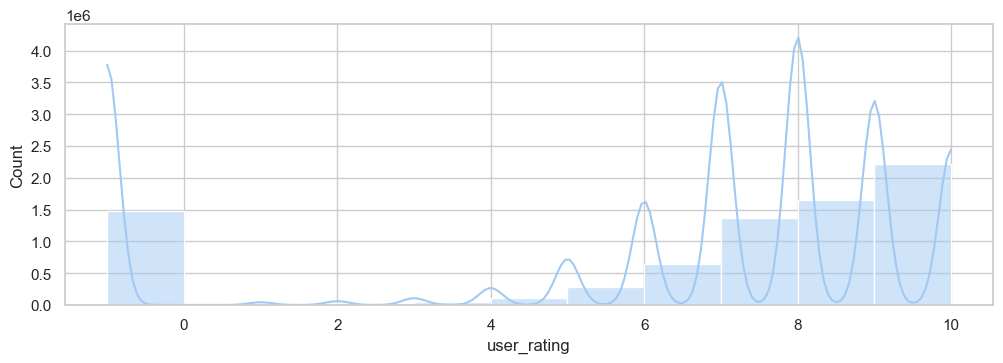

In [1232]:
fig, axs = plt.subplots(ncols=1, figsize=CONFIG.PLT_FIG_SIZE)
fig.tight_layout(pad=5.0)

sns.histplot(rating_merged_df, x='user_rating', kde=True,
             binrange=[-1, 10], binwidth=1, ax=axs)

rating_merged_df.describe()


### 2. Compare **Anime Dataframe** vs **Rating Merged Dataframe**

In [1233]:
rating_merged_droped_unrated_user_df = rating_merged_df.drop(
    rating_merged_df[rating_merged_df['user_rating'] < 0].index)

compare_anime_vs_rating_merged_df = rating_merged_droped_unrated_user_df.groupby(['anime_id']).agg({
    'members': 'mean',
    'user_id': 'count',
    'average_rating': 'mean',
    'user_rating': 'mean',
})
compare_anime_vs_rating_merged_df.rename(
    columns={
        'user_id': 'rating_merged: members (cal)',
        'user_rating': 'rating_merged: average_rating (cal)',
        'members': 'anime: members',
        'average_rating': 'anime: average_rating'
    },
    inplace=True)

print(f'{PRINT_COLOR_CODE.WARNING}Anime Dataframe vs Rating Merged Dataframe (droped users who have not rated anime){PRINT_COLOR_CODE.ENDC}\n')
print(
    f'{PRINT_COLOR_CODE.CYAN}Anime Dataframe{PRINT_COLOR_CODE.ENDC} contains {PRINT_COLOR_CODE.GREEN}{anime_df.shape[0]}{PRINT_COLOR_CODE.ENDC} unique animes')
print(
    f'{PRINT_COLOR_CODE.CYAN}Rating Merged Dataframe (droped users who have not rated anime){PRINT_COLOR_CODE.ENDC} contains {PRINT_COLOR_CODE.GREEN}{compare_anime_vs_rating_merged_df.shape[0]}{PRINT_COLOR_CODE.ENDC} unique animes')

compare_anime_vs_rating_merged_df


Anime Dataframe vs Rating Merged Dataframe (droped users who have not rated anime)

Anime Dataframe contains 12294 unique animes
Rating Merged Dataframe (droped users who have not rated anime) contains 9926 unique animes


,anime: members,rating_merged: members (cal),anime: average_rating,rating_merged: average_rating (cal)
anime_id,,,,
1,486824.0,13449,8.82,8.869433
5,137636.0,5790,8.40,8.439724
6,283069.0,9385,8.32,8.419393
7,64905.0,2169,7.36,7.533426
8,9848.0,308,7.06,7.198052
...,...,...,...,...
34324,817.0,11,5.40,5.909091
34325,1454.0,15,7.05,7.333333
34349,1885.0,3,7.25,7.000000


## **Data Cleansing (2)**

In Rating Merged DataFrame, replace all instances of `user_rating` with `average_rating` for rows where user_rating == -1 (unrated anime).

In [1234]:
rating_merged_df['user_rating'] = rating_merged_df.apply(
    lambda x: x['user_rating'] if x['user_rating'] > -1 else x['average_rating'], axis=1)

rating_merged_df.reset_index(drop=True, inplace=True)
rating_merged_df


,user_id,anime_id,user_rating,name,genre,type,episodes,average_rating,members
0,1,20,7.81,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
1,3,20,8.00,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
2,5,20,6.00,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
3,6,20,7.81,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
4,10,20,7.81,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
...,...,...,...,...,...,...,...,...,...
7813722,65682,30450,8.00,Dr. Slump: Hoyoyo! Arale no Himitsu Dai Koukai...,"Comedy, Sci-Fi, Shounen",Special,1,6.17,248
7813723,69497,33484,10.00,Shiroi Zou,"Action, Historical, Kids",Movie,1,4.71,45
7813724,70463,29481,4.33,Kakinoki Mokkii,"Fantasy, Kids",Special,1,4.33,61
7813725,72404,34412,6.76,Hashiri Hajimeta bakari no Kimi ni,Music,Music,1,6.76,239


## **Data Exploration (3)**

### 1. Compare **Anime Dataframe** vs **Rating Merged Dataframe**

In [1235]:
rating_merged_replaced_unrated_user_df = rating_merged_df.drop(
    rating_merged_df[rating_merged_df['user_rating'] < 0].index)

compare_anime_vs_rating_merged_df = rating_merged_replaced_unrated_user_df.groupby(['anime_id']).agg({
    'members': 'mean',
    'user_id': 'count',
    'average_rating': 'mean',
    'user_rating': 'mean',
})
compare_anime_vs_rating_merged_df.rename(
    columns={
        'user_id': 'rating_merged: members (cal)',
        'user_rating': 'rating_merged: average_rating (cal)',
        'members': 'anime: members',
        'average_rating': 'anime: average_rating'
    },
    inplace=True)

print(f'{PRINT_COLOR_CODE.WARNING}Anime Dataframe vs Rating Merged Dataframe (after assigning average rating intead of user rating for users who have not rated anime){PRINT_COLOR_CODE.ENDC}\n')
print(
    f'{PRINT_COLOR_CODE.CYAN}Anime Dataframe{PRINT_COLOR_CODE.ENDC} contains {PRINT_COLOR_CODE.GREEN}{anime_df.shape[0]}{PRINT_COLOR_CODE.ENDC} unique animes')
print(
    f'{PRINT_COLOR_CODE.CYAN}Rating Merged Dataframe (after assigning average rating intead of user rating for users who have not rated anime){PRINT_COLOR_CODE.ENDC} contains {PRINT_COLOR_CODE.GREEN}{compare_anime_vs_rating_merged_df.shape[0]}{PRINT_COLOR_CODE.ENDC} unique animes')

compare_anime_vs_rating_merged_df


Anime Dataframe vs Rating Merged Dataframe (after assigning average rating intead of user rating for users who have not rated anime)

Anime Dataframe contains 12294 unique animes
Rating Merged Dataframe (after assigning average rating intead of user rating for users who have not rated anime) contains 11197 unique animes


,anime: members,rating_merged: members (cal),anime: average_rating,rating_merged: average_rating (cal)
anime_id,,,,
1,486824.0,15509,8.82,8.862867
5,137636.0,6927,8.40,8.433203
6,283069.0,11077,8.32,8.404211
7,64905.0,2629,7.36,7.503081
8,9848.0,413,7.06,7.162954
...,...,...,...,...
34367,582.0,5,5.97,5.394000
34412,239.0,1,6.76,6.760000
34475,313.0,4,6.58,6.645000


### 2. **Anime Dataframe** Top 10 Members and Top 10 Average Rating

[Text(0, 0, 'Taka no Tsume 8: Yoshida-kun no X-Files'),
 Text(1, 0, 'Spoon-hime no Swing Kitchen'),
 Text(2, 0, 'Mogura no Motoro'),
 Text(3, 0, 'Kimi no Na wa.'),
 Text(4, 0, 'Kahei no Umi'),
 Text(5, 0, 'Fullmetal Alchemist: Brotherhood'),
 Text(6, 0, 'Gintama°'),
 Text(7, 0, 'Yakusoku: Africa Mizu to Midori'),
 Text(8, 0, 'Steins;Gate'),
 Text(9, 0, 'Gintama&#039;')]

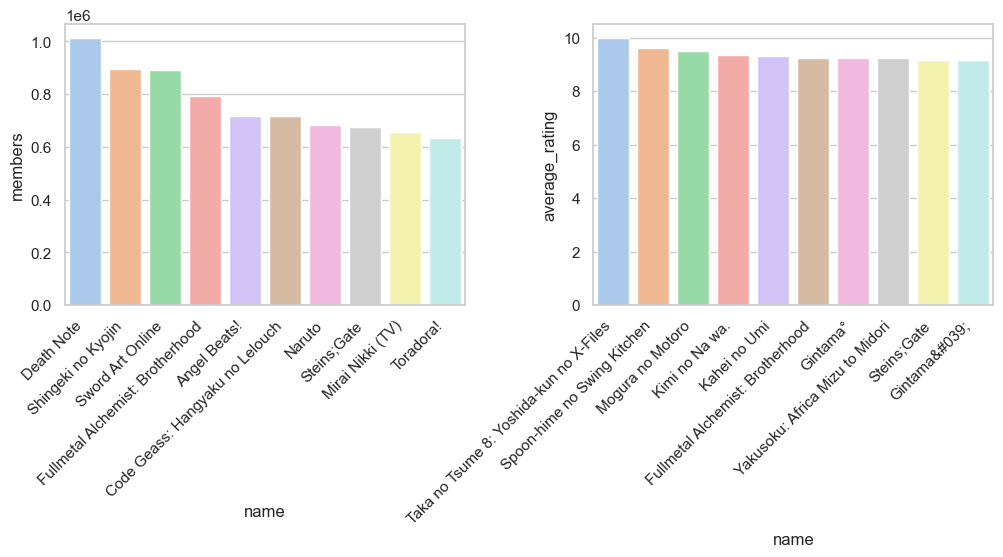

In [1236]:
anime_top_10_members_df = anime_df.sort_values(
    by='members', ascending=False).head(10)
anime_top_10_rating_df = anime_df.sort_values(
    by='average_rating', ascending=False).head(10)

fig, axs = plt.subplots(ncols=2, figsize=CONFIG.PLT_FIG_SIZE)
fig.tight_layout(pad=5.0)

plt_0 = sns.barplot(data=anime_top_10_members_df, x='name',
                    y='members', ax=axs[0])
plt_0.set_xticklabels(plt_0.get_xticklabels(),
                      rotation=45, horizontalalignment='right')

plt_1 = sns.barplot(data=anime_top_10_rating_df, x='name',
                    y='average_rating',  ax=axs[1])
plt_1.set_xticklabels(plt_1.get_xticklabels(),
                      rotation=45, horizontalalignment='right')


## **Recommended System (Content-based filtering)**

### 1. **Import Libraries**

In [1237]:
import nltk


### 2. **Config**

In [1238]:
stopwords = nltk.corpus.stopwords.words("english")
nltk.download("stopwords")


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/phukphoom/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### 3. **Define Util Functions**

In [1239]:
# function to return list of keywords from the input text
def get_keywords(input_text):
    if input_text is np.NaN:
        return []

    input_text = input_text.lower()

    input_text = ''.join(
        [char for char in input_text if char.isalpha() or char.isspace()])

    return [ele for ele in input_text.split() if ele not in stopwords]


# funtions to return the jaccard similarity between two lists
def jaccard_similarity(x, y):
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))

    if (union_cardinality == 0):
        print(union_cardinality, x, y)

    return intersection_cardinality/float(union_cardinality)


### 4. **Implmenting Core**

In [1240]:
class ContentBasedFiltering:
    WEIGHT_AVG_RATING = 0.7
    WEIGHT_GENRE = 0.3

    def __init__(self, ctb_user_rating_merged_df, ctb_anime_df):
        self.user_rating_merged_df = ctb_user_rating_merged_df.copy()
        self.anime_df = ctb_anime_df.copy()

    def suggest(self, n, picked_anime_id, debug=False):
        if self.anime_df[self.anime_df['anime_id'] == picked_anime_id].empty:
            raise ValueError(
                'Not found picked anime id ({picked_anime_id}) in self.anime_df')

        picked_anime_keywords = {
            'genre': get_keywords(self.anime_df[self.anime_df['anime_id'] == picked_anime_id]['genre'].tolist()[0])
        }

        if debug:
            print(
                f'{PRINT_COLOR_CODE.FAIL}{ContentBasedFiltering.WEIGHT_GENRE} Selected Anime Keywords (genre) : {PRINT_COLOR_CODE.WARNING}{picked_anime_keywords["genre"]}{PRINT_COLOR_CODE.ENDC}\n'
            )

        self.anime_df['keywords_genre'] = self.anime_df.apply(
            lambda x: get_keywords(x['genre']), axis=1)

        self.anime_df['ranking_score'] = self.anime_df.apply(
            lambda x:
            (ContentBasedFiltering.WEIGHT_AVG_RATING) *
            x['average_rating']/float(10)

            + (ContentBasedFiltering.WEIGHT_GENRE) *
            jaccard_similarity(
                picked_anime_keywords['genre'], x['keywords_genre']
            ),
            axis=1)

        return self.anime_df[self.anime_df['anime_id'] != picked_anime_id].sort_values(by='average_rating', ascending=False).sort_values(by='ranking_score', ascending=False).head(n)


### 5. **Evaluation**

In [1241]:
anime_suggestion_size = 10


In [1256]:
min_n_animes_threshold = 0

In [1257]:
user_selection_size = 300

print(f'{PRINT_COLOR_CODE.WARNING}select {PRINT_COLOR_CODE.GREEN}{user_selection_size} users{PRINT_COLOR_CODE.ENDC}')

selected_user_ids = np.random.choice(rating_merged_df.groupby('user_id').filter(
    lambda x: len(x) >= min_n_animes_threshold)['user_id'].unique(), size=user_selection_size
).tolist()
print(f'{PRINT_COLOR_CODE.WARNING}selected user ids (for evaluation) : {PRINT_COLOR_CODE.CYAN}{selected_user_ids}{PRINT_COLOR_CODE.ENDC}')


select 300 users
selected user ids (for evaluation) : [16984, 66637, 67340, 70912, 33390, 53730, 1657, 35966, 24216, 17150, 23071, 65212, 46310, 68486, 20750, 56958, 32051, 58034, 46643, 29349, 72819, 72264, 35805, 30518, 35115, 48985, 68465, 54149, 31005, 64694, 17028, 35291, 47029, 63319, 47207, 33250, 32333, 17151, 11959, 46016, 63654, 11341, 17069, 14642, 26900, 58272, 7031, 11067, 59218, 21665, 56984, 13870, 15618, 12630, 56113, 49052, 21849, 59748, 6616, 46961, 47313, 38505, 55352, 55487, 13313, 14269, 47020, 25637, 20663, 11308, 12968, 3571, 23677, 23933, 28220, 38757, 69088, 8546, 62480, 54340, 42770, 62576, 35382, 1410, 29220, 33749, 35006, 26315, 16946, 39499, 51817, 27639, 42267, 7737, 19272, 31503, 3060, 38818, 13781, 16099, 32189, 68856, 57945, 11132, 43848, 186, 2517, 7143, 18903, 46824, 16060, 24143, 18460, 4263, 54175, 23681, 56600, 4876, 46217, 59113, 70229, 49323, 68107, 17822, 42465, 21404, 49213, 47409, 67245, 25080, 21768, 3117, 14557, 57638, 34811, 60441, 68642, 2

#### 5.1. **Evaluation** using **Top-K Precision**

In [1258]:
k = 10

print(
    f'Evaluation using {PRINT_COLOR_CODE.BOLD}{PRINT_COLOR_CODE.GREEN}Top-{k} Precision{PRINT_COLOR_CODE.ENDC}'
)


Evaluation using Top-10 Precision


In [1259]:
avg_top_k_score_by_time_list = []
sum_top_k_score = 0
for selected_user_id in selected_user_ids:
    selected_user_rating_merged_df = rating_merged_df[rating_merged_df['user_id']
                                                      == selected_user_id]
    selected_user_rating_merged_df.reset_index(drop=True, inplace=True)

    selected_anime_id = np.random.choice(
        selected_user_rating_merged_df['anime_id'].unique(), size=1)[0]

    # print(
    #     f'\nTest by having user_id:{selected_user_id} pick anime_id:{selected_anime_id}'
    # )

    ctb_suggestion_df = ContentBasedFiltering(
        selected_user_rating_merged_df, anime_df
    ).suggest(n=anime_suggestion_size, picked_anime_id=selected_anime_id)

    top_k_score = len(set.intersection(
        *[set(ctb_suggestion_df['anime_id'].head(k)), set(selected_user_rating_merged_df['anime_id'])]))/float(k)

    # print(
    #     f'top_k_score : {top_k_score:.4f} (k = {k}, Suggest {len(ctb_suggestion_df)} animes, Answer {len(selected_user_rating_merged_df)-1} animes)'
    # )

    sum_top_k_score += top_k_score
    avg_top_k_score_by_time_list.append(
        sum_top_k_score/float(len(avg_top_k_score_by_time_list)+1))

print(
    f'\n{PRINT_COLOR_CODE.WARNING}avg_top_k_score : {PRINT_COLOR_CODE.GREEN}{avg_top_k_score_by_time_list[-1]}{PRINT_COLOR_CODE.ENDC}'
)



avg_top_k_score : 0.1393333333333335


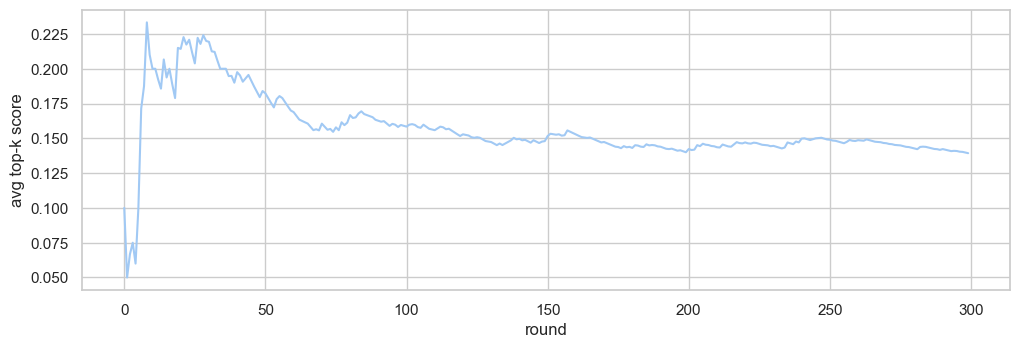

In [1260]:
fig, axs = plt.subplots(ncols=1, figsize=CONFIG.PLT_FIG_SIZE)
fig.tight_layout(pad=5.0)

plt_0 = sns.lineplot(
    avg_top_k_score_by_time_list, ax=axs).set(xlabel='round', ylabel='avg top-k score')


#### 5.2. **Evaluation** using **AUC**

In [1261]:
avg_auc_score_by_time_list = []
sum_auc_score = 0
for selected_user_id in selected_user_ids:
    selected_user_rating_merged_df = rating_merged_df[rating_merged_df['user_id']
                                                      == selected_user_id]
    selected_user_rating_merged_df.reset_index(drop=True, inplace=True)

    selected_anime_id = np.random.choice(
        selected_user_rating_merged_df['anime_id'].unique(), size=1)[0]

    # print(
    #     f'\nTest by having user_id:{selected_user_id} pick anime_id:{selected_anime_id}'
    # )

    core = ContentBasedFiltering(
        selected_user_rating_merged_df, anime_df
    )

    core.suggest(
        n=anime_suggestion_size, picked_anime_id=selected_anime_id)

    ctb_anime_actual_interect_df = core.anime_df[core.anime_df['anime_id'].isin(
        selected_user_rating_merged_df['anime_id'])].copy()
    ctb_anime_not_interect_df = core.anime_df[~core.anime_df['anime_id'].isin(
        selected_user_rating_merged_df['anime_id'])].copy()

    auc_score = 0

    n = len(ctb_anime_actual_interect_df) * len(ctb_anime_not_interect_df)

    ctb_anime_actual_interect_df['n_prime'] = ctb_anime_actual_interect_df.apply(
        lambda x: len(ctb_anime_not_interect_df[x['ranking_score'] > ctb_anime_not_interect_df['ranking_score']]), axis=1)
    ctb_anime_actual_interect_df['n_prime_2'] = ctb_anime_actual_interect_df.apply(
        lambda x: len(ctb_anime_not_interect_df[x['ranking_score'] == ctb_anime_not_interect_df['ranking_score']]), axis=1)

    n_prime = ctb_anime_actual_interect_df['n_prime'].sum()
    n_prime_2 = ctb_anime_actual_interect_df['n_prime_2'].sum()

    auc_score = (n_prime + (0.5 * n_prime_2)) / n

    # print(
    #     f'auc_score : {auc_score:.4f} (n = {n}, n\' = {n_prime} , n\" = {n_prime_2}) (actual_interect : {len(ctb_anime_actual_interect_df)}, not_interect : {len(ctb_anime_not_interect_df)})'
    # )

    sum_auc_score += auc_score
    avg_auc_score_by_time_list.append(
        sum_auc_score/float(len(avg_auc_score_by_time_list)+1))

print(
    f'\n{PRINT_COLOR_CODE.WARNING}avg_auc_score : {PRINT_COLOR_CODE.GREEN}{avg_auc_score_by_time_list[-1]}{PRINT_COLOR_CODE.ENDC}'
)



avg_auc_score : 0.8612770656384201


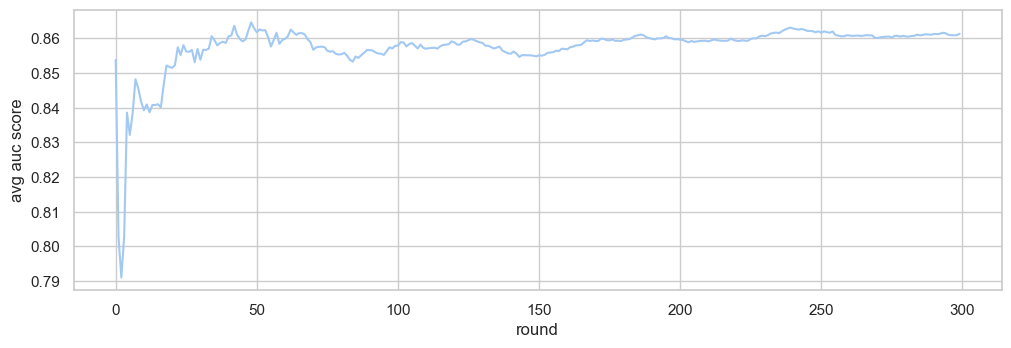

In [1262]:
fig, axs = plt.subplots(ncols=1, figsize=CONFIG.PLT_FIG_SIZE)
fig.tight_layout(pad=5.0)

plt_0 = sns.lineplot(
    avg_auc_score_by_time_list, ax=axs).set(xlabel='round', ylabel='avg auc score')


### **6. Try Suggestion** using **Content-based filtering**

In [1263]:
USER_RATING_CSV_PATH = "./tests/user_rating.csv"

In [1264]:
user_rating_merged_df = pd.read_csv(USER_RATING_CSV_PATH).merge(
    anime_df, on='anime_id', how='inner'
)
user_rating_merged_df.rename(columns={'rating': 'user_rating'}, inplace=True)

user_rating_merged_df


,user_id,anime_id,user_rating,name,genre,type,episodes,average_rating,members
0,9999999,28977,5,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
1,9999999,9969,-1,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
2,9999999,15417,2,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109
3,9999999,6945,-1,Gintama: Shiroyasha Koutan,"Action, Comedy, Historical, Parody, Sci-Fi",Special,1,8.37,27213
4,9999999,241,9,Girls Bravo: First Season,"Comedy, Ecchi, Fantasy, Harem, Romance, School",TV,11,6.69,84395
5,9999999,355,5,Shakugan no Shana,"Action, Drama, Fantasy, Romance, School, Super...",TV,24,7.74,297058
6,9999999,356,10,Fate/stay night,"Action, Fantasy, Magic, Romance, Supernatural",TV,24,7.58,374880
7,9999999,442,2,Naruto Movie 1: Dai Katsugeki!! Yuki Hime Shin...,"Adventure, Comedy, Drama, Historical, Shounen,...",Movie,1,7.17,120571


In [1265]:
core = ContentBasedFiltering(
    user_rating_merged_df, anime_df
)


In [1266]:
core.anime_df

,anime_id,name,genre,type,episodes,average_rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [1267]:
core.user_rating_merged_df

,user_id,anime_id,user_rating,name,genre,type,episodes,average_rating,members
0,9999999,28977,5,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
1,9999999,9969,-1,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
2,9999999,15417,2,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109
3,9999999,6945,-1,Gintama: Shiroyasha Koutan,"Action, Comedy, Historical, Parody, Sci-Fi",Special,1,8.37,27213
4,9999999,241,9,Girls Bravo: First Season,"Comedy, Ecchi, Fantasy, Harem, Romance, School",TV,11,6.69,84395
5,9999999,355,5,Shakugan no Shana,"Action, Drama, Fantasy, Romance, School, Super...",TV,24,7.74,297058
6,9999999,356,10,Fate/stay night,"Action, Fantasy, Magic, Romance, Supernatural",TV,24,7.58,374880
7,9999999,442,2,Naruto Movie 1: Dai Katsugeki!! Yuki Hime Shin...,"Adventure, Comedy, Drama, Historical, Shounen,...",Movie,1,7.17,120571


In [1268]:
ctb_suggestion_df = core.suggest(n=10, picked_anime_id=28977, debug=True)

ctb_suggestion_df


0.3 Selected Anime Keywords (genre) : ['action', 'comedy', 'historical', 'parody', 'samurai', 'scifi', 'shounen']



,anime_id,name,genre,type,episodes,average_rating,members,keywords_genre,ranking_score
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,"[action, comedy, historical, parody, samurai, ...",0.941200
9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109,"[action, comedy, historical, parody, samurai, ...",0.937700
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534,"[action, comedy, historical, parody, samurai, ...",0.937000
12,918,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,201,9.04,336376,"[action, comedy, historical, parody, samurai, ...",0.932800
63,21899,Gintama: Yorinuki Gintama-san on Theater 2D,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,2,8.60,11104,"[action, comedy, historical, parody, samurai, ...",0.902000
65,7472,Gintama Movie: Shinyaku Benizakura-hen,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,8.59,51185,"[action, comedy, historical, parody, samurai, ...",0.901300
216,9735,Gintama: Shinyaku Benizakura-hen,"Action, Comedy, Historical, Parody, Samurai, S...",Special,1,8.31,14002,"[action, comedy, historical, parody, samurai, ...",0.881700
306,25313,Gintama: Jump Festa 2014 Special,"Action, Comedy, Historical, Parody, Samurai, S...",Special,1,8.20,13764,"[action, comedy, historical, parody, samurai, ...",0.874000
380,2951,Gintama: Nanigoto mo Saiyo ga Kanjin nano de T...,"Action, Comedy, Historical, Mecha, Parody, Sam...",Special,1,8.13,29331,"[action, comedy, historical, mecha, parody, sa...",0.831600
361,32122,Gintama: Jump Festa 2015 Special,"Action, Comedy, Historical, Parody, Samurai, S...",Special,1,8.15,7923,"[action, comedy, historical, parody, samurai, ...",0.827643


[Text(0, 0, 'Gintama&#039;'),
 Text(1, 0, 'Gintama&#039;: Enchousen'),
 Text(2, 0, 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare'),
 Text(3, 0, 'Gintama'),
 Text(4, 0, 'Gintama: Yorinuki Gintama-san on Theater 2D'),
 Text(5, 0, 'Gintama Movie: Shinyaku Benizakura-hen'),
 Text(6, 0, 'Gintama: Shinyaku Benizakura-hen'),
 Text(7, 0, 'Gintama: Jump Festa 2014 Special'),
 Text(8, 0, 'Gintama: Nanigoto mo Saiyo ga Kanjin nano de Tasho Senobisuru Kurai ga Choudoyoi'),
 Text(9, 0, 'Gintama: Jump Festa 2015 Special')]

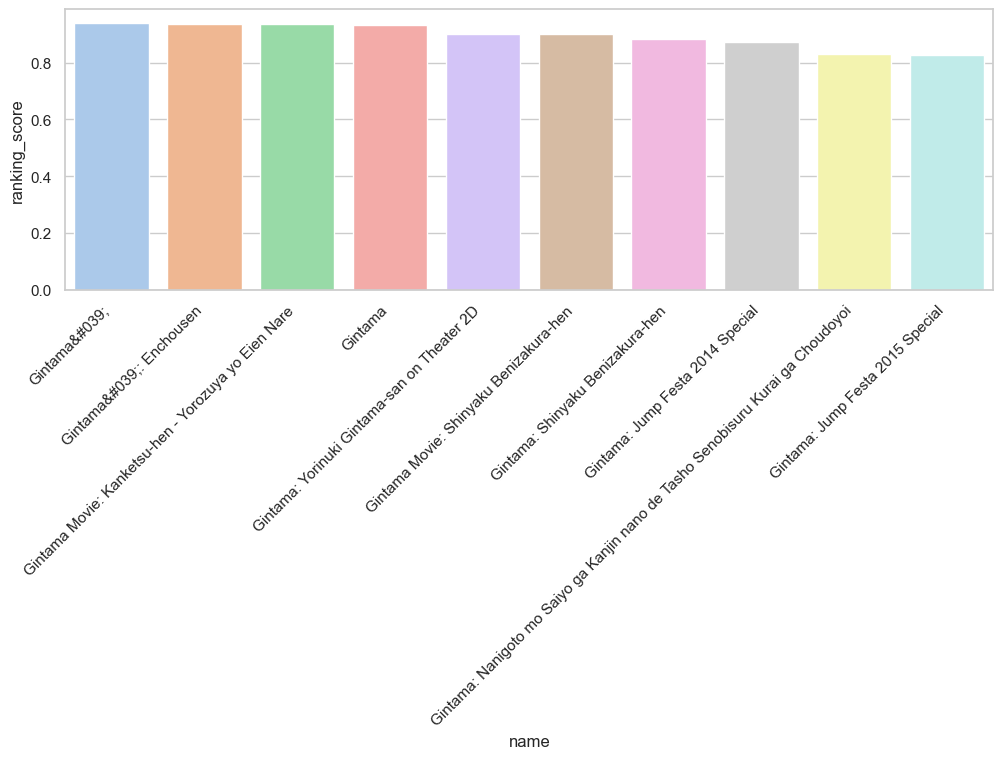

In [1269]:
fig, axs = plt.subplots(ncols=1, figsize=CONFIG.PLT_FIG_SIZE)
fig.tight_layout(pad=5.0)

plt_0 = sns.barplot(data=ctb_suggestion_df, x='name',
                    y='ranking_score', ax=axs)
plt_0.set_xticklabels(plt_0.get_xticklabels(),
                      rotation=45, horizontalalignment='right')


## **Recommended System (Collaborative filtering)**

MAE (Mean Absolute Error)
- MAE = 1/n * Σ |y - y^|

Top-K
- Top-K = N/K

AUC
- AUC = (n'+0.5n") / n